In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display
import itertools
%matplotlib inline

sns.set(rc={'figure.figsize':(12,8)})

In [2]:
df = pd.read_csv('all_data.csv')
display(df.head())
print(df.info())

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None


In [3]:
print(f"There are {len(df['Country'].unique())} countries")

There are 6 countries


Text(0.5, 1.0, 'GDP over Time by Country')

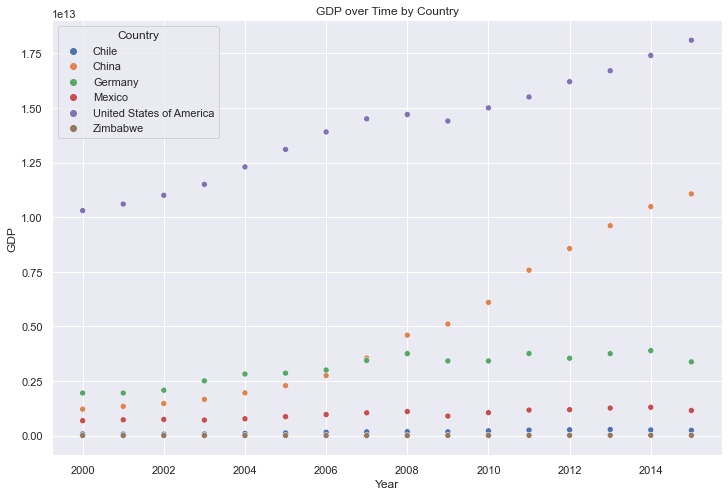

In [4]:
# for country in df['Country'].unique():
#     sns.scatterplot(data=df[df['Country'] == country], x='Year', y='GDP', label=country, loc='upper left')
sns.scatterplot(data=df, x='Year', y='GDP', hue='Country')
plt.title('GDP over Time by Country')

The above plot clearl shows that the GDP of the USA is much higher than that of other countries and as of 2014 is pretty consistently increasing, with only one dip at 2009 (possibly related to the Great Recession). China clearly has the fastest growing ecvonomy with a harsh increase starting in 2004.
Due to the massive values for both China and the USA, it is difficult to see any patterns in the other Countries, we will look at closer plots later on.

# Correlogram 

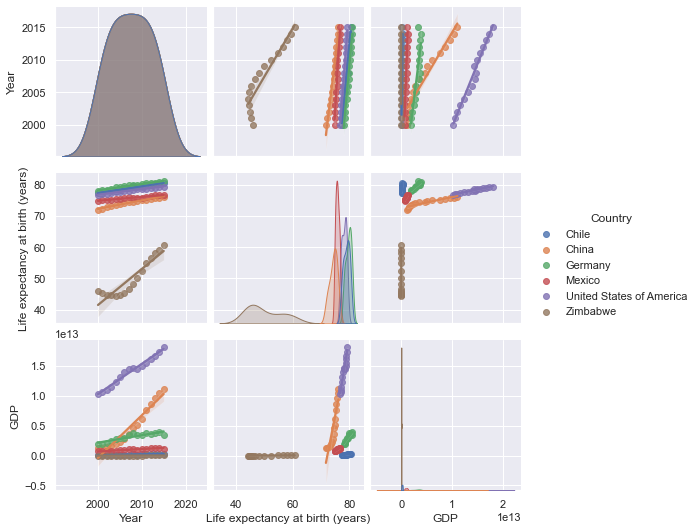

In [5]:
sns.pairplot(df, kind="reg", hue='Country')
plt.show()

This carrelogram shows certain trends, such as life expectancy increasing over time pretty steadily for most countries. If you want to look more into carrelograms [The Python Graph Gallery](https://www.python-graph-gallery.com/111-custom-correlogram) is a great place to look at different plots. Despite this carrelogram not being so useful for this dataset, it can come in useful when you have a lot of columns of quantitative data (I'd recommend checking out [Data sets for Quantitative Research](https://libraryguides.missouri.edu/datasets/public-use))

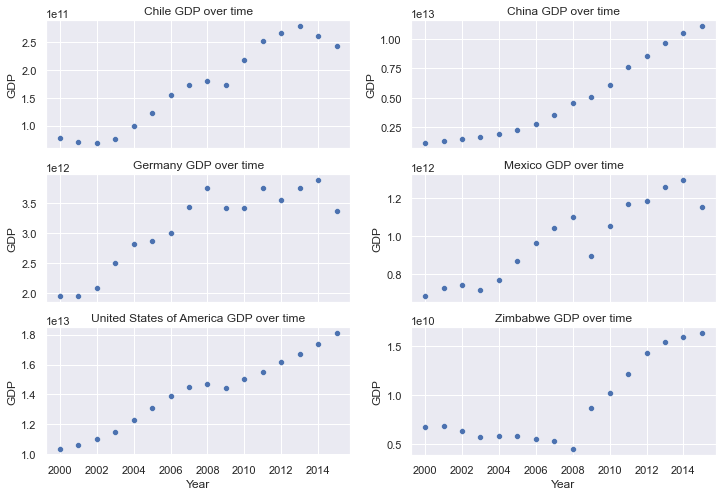

<Figure size 864x576 with 0 Axes>

In [6]:
fig, axes = plt.subplots(3, 2, sharex=True)
axes = list(itertools.chain(*axes))
for idx, country in enumerate(df['Country'].unique()):
    sns.scatterplot(x='Year', y='GDP', data=df[df['Country'] == country], ax=axes[idx])
    axes[idx].set_title(f'{country} GDP over time')
plt.show()
plt.clf()

##### Code explanation
If you haven't seen it before `list(itertools.chain(*axes))` may seem quite confusing, but trust me, it is actually very simple! All this does is take a "shallow list" (i.e. `[[1, 2, 3], [2, 1, 1], [1, 1], [2]]`) and converts it into a flat list (i.e. `[1, 2, 3, 2, 1, 1, 1, 1, 2]`). The `list` conversion is necessary to convert it from an `<itertools.chain object>` to a `<list>`.
##### What do the results show?
Very generally, and not overall, but generally from 2000->2014 GDP has increased. With every single country having a higher GDP in 2014 in comparison to 2000. The country which most clearly follows a different trend to the rest is Zimbabwe, with a decreasing GDP from 2000 -> 2008. The increase after this point may be attributed to the drop of the Zimbabwe Dollar and the acceptance of foreign money.

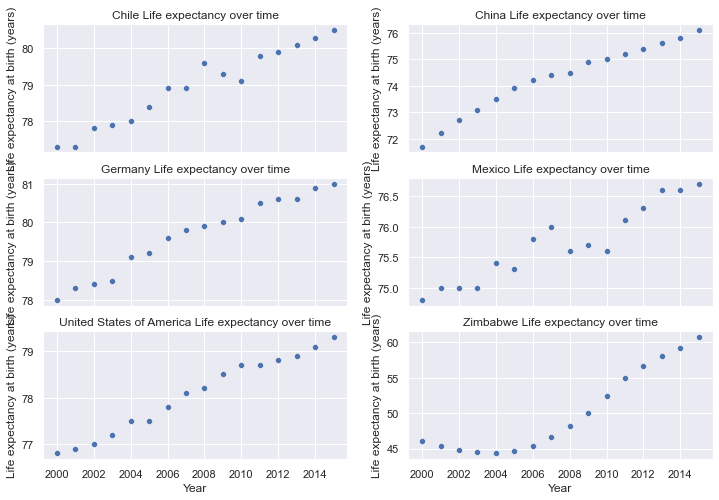

<Figure size 864x576 with 0 Axes>

In [7]:
fig, axes = plt.subplots(3, 2, sharex=True)
axes = list(itertools.chain(*axes))
for idx, country in enumerate(df['Country'].unique()):
    sns.scatterplot(x='Year', y='Life expectancy at birth (years)', data=df[df['Country'] == country], ax=axes[idx])
    axes[idx].set_title(f'{country} Life expectancy over time')
plt.show()
plt.clf()


Again, a general increase can be seen with life expectancy increasing for all countries. Similarly to its GDP, Zimbabwe sees a decrease at the start of the 21st century and then a steady increase after that point. Zimbabwe still has the lowest life expectancy of all the countries in the dataset.

<AxesSubplot:xlabel='Country', ylabel='Life expectancy at birth (years)'>

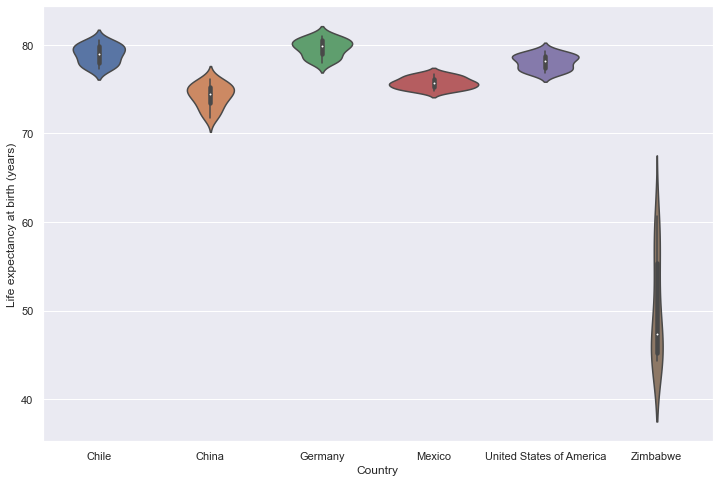

In [8]:
sns.violinplot(y='Life expectancy at birth (years)', x='Country', data=df)

# [World Bank Data](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD)
## A guide to cleaning data
I now downloaded World Bank Data for the GDP of many countries, let's look at reusing our other bits of code for this dataset.

The dataset begins with:
```
"Data Source","World Development Indicators",

"Last Updated Date","2022-06-30",

```
So these lines must be removed.
It also adds an extra column at the end because it has a blank `,` at the end of each line, so this column must be removed.

In [9]:
from io import StringIO

csv = ''.join(open('API_NY.GDP.MKTP.CD_DS2_en_csv_v2_4251000/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_4251000.csv', 'r', encoding='utf-8').readlines()[4:])
csvFile = StringIO(csv)
df2 = pd.read_csv(csvFile).iloc[: , :-1]
display(df2.head())

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.615084e+09,2.727933e+09,2.791061e+09,2.963128e+09,2.983799e+09,3.092179e+09,3.202235e+09,3.310056e+09,2.496648e+09,NaN
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,2.129059e+10,2.180847e+10,2.370702e+10,2.821004e+10,2.611879e+10,2.968217e+10,...,9.730435e+11,9.839370e+11,1.003679e+12,9.242525e+11,8.823551e+11,1.020647e+12,9.910223e+11,9.975340e+11,9.216459e+11,1.082096e+12
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10,1.879945e+10,2.011614e+10,NaN
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.040414e+10,1.112789e+10,1.194319e+10,1.267633e+10,1.383837e+10,1.486223e+10,...,7.275704e+11,8.207927e+11,8.649905e+11,7.607345e+11,6.905464e+11,6.837487e+11,7.416899e+11,7.945430e+11,7.844457e+11,8.358084e+11
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.249982e+11,1.334016e+11,1.372444e+11,8.721929e+10,4.984049e+10,6.897276e+10,7.779294e+10,6.930910e+10,5.361907e+10,7.254699e+10


This data needs to be cleaned up again. Can you see why? It's because years are each a seperate column (this is normally useful when training ML models) but we want them to be like a previous dataset. Where we have a column named Year and a column named GDP. How can we do this? 

We can use the code (adapted from [this stackoverflow answer](https://stackoverflow.com/a/60167500/5210078)) to create a dataset similar to the one found in the previous dataset.

In [31]:
years = [str(year) for year in range(1960, 2022)]
c = df2.columns.difference(years, sort=False).tolist()
display(df2.set_index(c).stack().to_frame().reset_index().rename(columns= {
    'level_4': 'Year',
    0: 'GDP'
}))
# .index.to_frame(index=False).rename(columns={len(c): 'Year'})

,Country Name,Country Code,Indicator Name,Indicator Code,Year,GDP
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,1986,4.055866e+08
1,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,1987,4.877095e+08
2,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,1988,5.966480e+08
3,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,1989,6.955307e+08
4,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,1990,7.648045e+08
...,...,...,...,...,...,...
13113,Zimbabwe,ZWE,GDP (current US$),NY.GDP.MKTP.CD,2017,1.758489e+10
13114,Zimbabwe,ZWE,GDP (current US$),NY.GDP.MKTP.CD,2018,1.811554e+10
13115,Zimbabwe,ZWE,GDP (current US$),NY.GDP.MKTP.CD,2019,1.928429e+10
13116,Zimbabwe,ZWE,GDP (current US$),NY.GDP.MKTP.CD,2020,1.805117e+10


But, how does the above code work? What actually happens here? We will now break down each stage to show how it works.

In [32]:
years = [str(year) for year in range(1960, 2022)] # self explanatory, creates a list of years ["1960"..."2022"]

In [34]:
c = df2.columns.difference(years, sort=False).tolist()
print(df2.columns)

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='object')


The above line of code is a bit more difficult to understand, what is it doing? Let's start by looking at, what is `df.columns`? `df.columns` returns a `pd.Index` type which is a list of all the columns. It looks like so:

```python
Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='object')
```

The `dtype` property at the end tells us that the `pd.Index` is a list of strings (strings in Python are often called `objects` due to C/numpy naming conventions).

Because it is a `pd.Index` type, we can use the [pd.Index.difference](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Index.difference.html) function, which lets us basically take away from two lists. By default it then attempts to sort the "array" so we will tell it not to. 

The following two pieces of code are virtually equivalent in function:
###### Pandas
```python
import pandas as pd

array1 = pd.Index([1, 2, 3, 4])
array2 = [3, 2, 4, 5, 6]
print(array1.difference(array2, sort=False))
```
###### Pure explicit python
```python
array1 = [1, 2, 3, 4]
array2 = [3, 2, 4, 5, 6]
arr = []
for idx, element in enumerate(array1):
    if element not in array2:
        arr.append(element)
print(arr)
```


So when we do `df2.columns.difference(years, sort=False)`, we are getting a list of column names that aren't a year. So we get the Index: `['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']`. But we want a python list, so we convert it using the `pd.Index.tolist()` function.

In [36]:
display(df2.set_index(c).head())

,,,,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Country Name,Country Code,Indicator Name,Indicator Code,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.615084e+09,2.727933e+09,2.791061e+09,2.963128e+09,2.983799e+09,3.092179e+09,3.202235e+09,3.310056e+09,2.496648e+09,NaN
Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,2.129059e+10,2.180847e+10,2.370702e+10,2.821004e+10,2.611879e+10,2.968217e+10,3.223912e+10,3.351455e+10,3.652148e+10,4.182834e+10,...,9.730435e+11,9.839370e+11,1.003679e+12,9.242525e+11,8.823551e+11,1.020647e+12,9.910223e+11,9.975340e+11,9.216459e+11,1.082096e+12
Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,1.373333e+09,1.408889e+09,...,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10,1.879945e+10,2.011614e+10,NaN
Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.040414e+10,1.112789e+10,1.194319e+10,1.267633e+10,1.383837e+10,1.486223e+10,1.583259e+10,1.442604e+10,1.488035e+10,1.688209e+10,...,7.275704e+11,8.207927e+11,8.649905e+11,7.607345e+11,6.905464e+11,6.837487e+11,7.416899e+11,7.945430e+11,7.844457e+11,8.358084e+11
Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.249982e+11,1.334016e+11,1.372444e+11,8.721929e+10,4.984049e+10,6.897276e+10,7.779294e+10,6.930910e+10,5.361907e+10,7.254699e+10


Using `df2.set_index(c)` creates a new DataFrame where the old index of `1, 2, 3, 4, 5......` is replaced by the columns `['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']`. This is called a [pd.MultiIndex](https://pandas.pydata.org/docs/user_guide/advanced.html) because there are multiple columns being used as an index. If you run `print(df2.set_index(c).index[0])` you will see that the index for the first row is `('Aruba', 'ABW', 'GDP (current US$)', 'NY.GDP.MKTP.CD')` This tells us that the first row has a Country Name of Aruba, Country Code of ABW, Indicator Name of "GDP (current US$)" and an Indicator Code of `NY.GDP.MKTP.CD`.

In [40]:
display(df2.set_index(c).stack().head(10))

Country Name  Country Code  Indicator Name     Indicator Code      
Aruba         ABW           GDP (current US$)  NY.GDP.MKTP.CD  1986    4.055866e+08
                                                               1987    4.877095e+08
                                                               1988    5.966480e+08
                                                               1989    6.955307e+08
                                                               1990    7.648045e+08
                                                               1991    8.720670e+08
                                                               1992    9.586592e+08
                                                               1993    1.083240e+09
                                                               1994    1.245810e+09
                                                               1995    1.320670e+09
dtype: float64

We then use [stack](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.stack.html) to extend the aforementioned `pd.MultiIndex`. The function converts the current columns into a new Index. You should see from the above that the first row now has some more subrows (it now has more dimensions), so the country Aruba also has the rows `["1960"..."2022"]`. It also converts the dataframe to a `pd.Series` so we will now convert it back to a dataframe: 

In [47]:
display(df2.set_index(c).stack().to_frame())

0
Country Name Country Code Indicator Name    Indicator Code                   
Aruba        ABW          GDP (current US$) NY.GDP.MKTP.CD 1986  4.055866e+08
                                                           1987  4.877095e+08
                                                           1988  5.966480e+08
                                                           1989  6.955307e+08
                                                           1990  7.648045e+08
...                                                                       ...
Zimbabwe     ZWE          GDP (current US$) NY.GDP.MKTP.CD 2017  1.758489e+10
                                                           2018  1.811554e+10
                                                           2019  1.928429e+10
                                                           2020  1.805117e+10
                                                           2021  2.621773e+10

[13118 rows x 1 columns]

In [48]:
display(df2.set_index(c).stack().to_frame().reset_index())

,Country Name,Country Code,Indicator Name,Indicator Code,level_4,0
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,1986,4.055866e+08
1,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,1987,4.877095e+08
2,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,1988,5.966480e+08
3,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,1989,6.955307e+08
4,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,1990,7.648045e+08
...,...,...,...,...,...,...
13113,Zimbabwe,ZWE,GDP (current US$),NY.GDP.MKTP.CD,2017,1.758489e+10
13114,Zimbabwe,ZWE,GDP (current US$),NY.GDP.MKTP.CD,2018,1.811554e+10
13115,Zimbabwe,ZWE,GDP (current US$),NY.GDP.MKTP.CD,2019,1.928429e+10
13116,Zimbabwe,ZWE,GDP (current US$),NY.GDP.MKTP.CD,2020,1.805117e+10


Resetting the index converts all the MultiIndex back into columns. We now have a DataFrame like the previous dataset. We can then just rename the last two columns to make the names more clear.

What can you do now? I hand it on to you to now analyse this cleaned data! Perhaps try and change the previous lines of codes to work on this huge new dataset! Which countries are similar to Zimbabwe?